# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [85]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

 Observations: there are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [31]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Observations: there are three different data types in the dataset: 
1. Integer (for numeric variables: order_id, customer_id, food_preparation_time and delivery_time), 
2. String (for variables containing string information: restaurant_name, cuisine_type, day_of_the_week, and rating), and
3. Float(or decimal number)  (for the variable cost_of_the_order).

It is worth noting that python is treating the rating varaiable as string even though it contains a numeric information on customer rating, for the most part. This is due to existence of a string data,coded as "not given", in the rating variable for missing values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [173]:
# Write your code here
df.isna().sum()
#df.isnull().sum() this gives similar result

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [86]:
df.describe().T
df.describe(exclude= 'number').T
cat_col = ['rating', 'day_of_the_week']
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


Note: although Python reports that there are no missing values in the data, the rating variable has 736 observations where restaurant rating has not been provided by the customers. These observations have been coded as "Not given", leading the rating variable to be of string data format. We need to convert non-standard missing values "Not given" to standard missing value such as "NaN", which facilitates later the conversion of this data type to numeric and the calculation of summary statistics  

In [211]:
#treating the (non-standard) missing value "Not given" for rating variable & replacing it with NaN=standard missing values in Python
df2 = pd.read_csv('foodhub_order.csv')
Missing_values=['Not given']     #this works because the other variables do not contain non-standard missing values
df=df2.replace(Missing_values, np.NaN)
df.head()
#Python treats NaN as null when calculating summary statistics

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observation: although Python reports that there are no missing values in the data, the rating variable has 736 observations where restaurant rating has not been provided by the customers. These observations have been coded as "Not given", leading the rating variable to be of string data format. We need to convert non-standard missing values "Not given" to standard missing value such as "NaN" 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [213]:
#df.describe().T
df.food_preparation_time.describe () 

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Observations: the minimum, average and maximum time it takes for food to be prepared once an order is placed is 20, 2.737197e+01 (or 27.37197 minutes) and 35 minutes, respectively, as given by summary staistics of 'food_preparation_time' variable

### **Question 5:** How many orders are not rated? [1 mark]

In [182]:
# Write the code here
col = ['rating']
# Printing number of count of each unique value in each column
for column in col:
    print(df[column].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


Observations:there are 736 observations with 'Not given' response, corresponding to orders not rated by the customers

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
# Write the code here
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


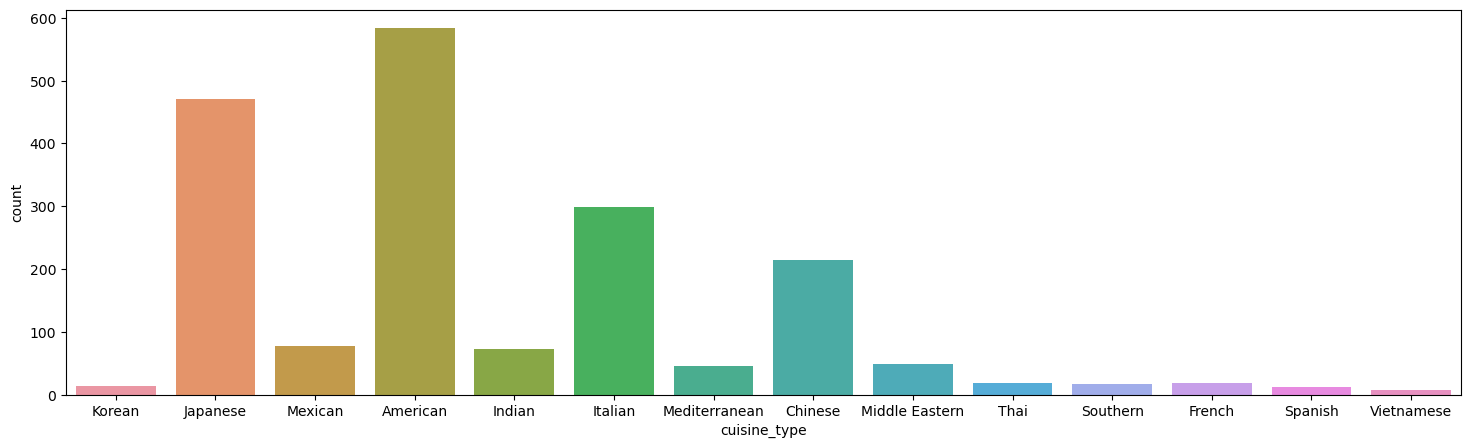

In [218]:
# count of observations for each day based on time
plt.figure(figsize = (18,5))

sns.countplot(data = df, x = 'cuisine_type')       
# display the plot
plt.show()

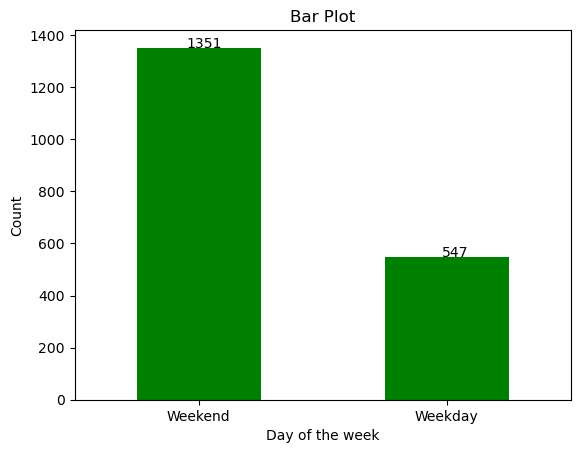

In [21]:
# bar plot to get the count of weekday and weekend occurences for the variable day_of_the_wek in the data

# kind='bar' plots a bar plot
# 'rot = 0' returns the categoric labels horizontally
# 'color' can be used to add a specific colour
#tips_data.smoker.value_counts().plot(kind='bar', rot = 0, color = 'green')
df.day_of_the_week.value_counts().plot(kind='bar',rot = 0, color = 'green')
# plt.text() adds the text to the plot
# x and y are positions on the axes
# s is the text to be added
plt.text(x = -0.05, y = df.day_of_the_week.value_counts()[0]+1, s = df.day_of_the_week.value_counts()[0])
plt.text(x = 0.98, y = df.day_of_the_week.value_counts()[1]+1, s = df.day_of_the_week.value_counts()[1])

# add title and axes labels
plt.title('Bar Plot')
plt.xlabel('Day of the week')
plt.ylabel('Count')

# display the plot
plt.show()



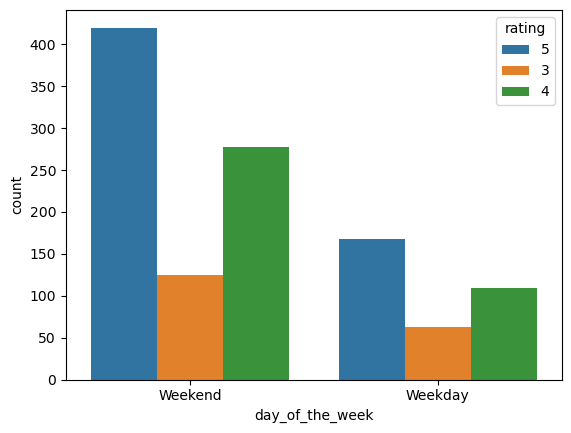

In [216]:
# count of observations for day of the week based on rating/count rating based on day of the week
# set 'time' as hue parameter
sns.countplot(data = df, x = 'day_of_the_week', hue = 'rating')
#sns.countplot(data = tips_data, x = 'day', hue = 'sex')
# display the plot
plt.show()

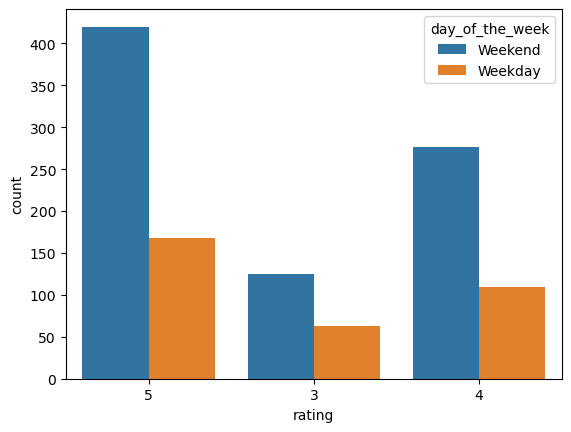

In [215]:
sns.countplot(data = df, x = 'rating', hue = 'day_of_the_week')
# display the plot
plt.show()

Observation: 
    1. weekend ratings tend to be higher than Weekday ratings. This could be becasue customers may have more time (are happier and/or quality of the service is better) to provide rating during weekends
    2. the number of orders during weekends are much larger than orders during weekday
    3. The most common ratings are 5 followed by 4 out or 5, while 3 is the least common rating
    4. American Cuisine, followed by Japanese is the most common type of restaurants with the highest orders

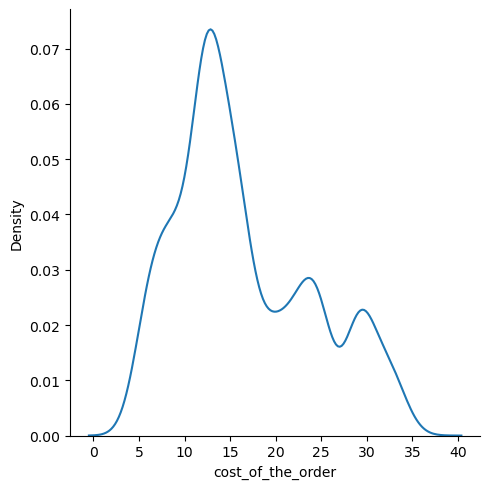

In [99]:
# plot a distribution plot
sns.displot(df['cost_of_the_order'], kind='kde' )
#sns.displot(tips_data['total_bill'], hist=True, kde=True)
#sns.displot(tips_data['total_bill'])
# display the plot
plt.show()

C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_of_the_order', ylabel='Density'>

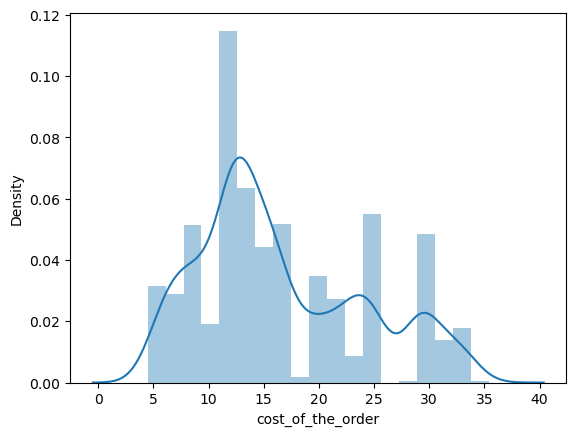

In [84]:
sns.distplot(df['cost_of_the_order'], hist = True, kde = True,)

Observation: Distribution of cost_of_the_order is right skewed with peak values between 10 and 15 dollars.

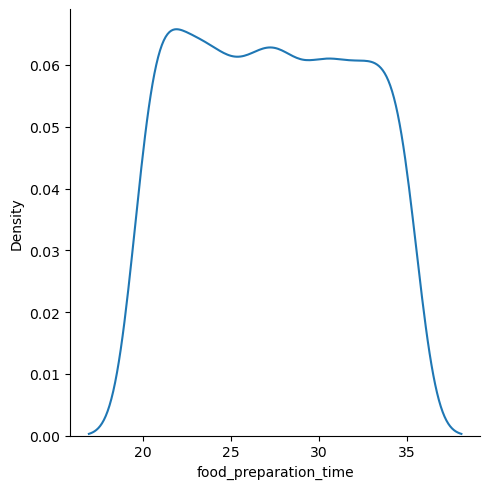

In [44]:

# plot a distribution plot
sns.displot(df['food_preparation_time'], kind='kde' )
#sns.displot(tips_data['total_bill'], hist=True, kde=True)
#sns.displot(tips_data['total_bill'])
# display the plot
plt.show()

C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='food_preparation_time', ylabel='Density'>

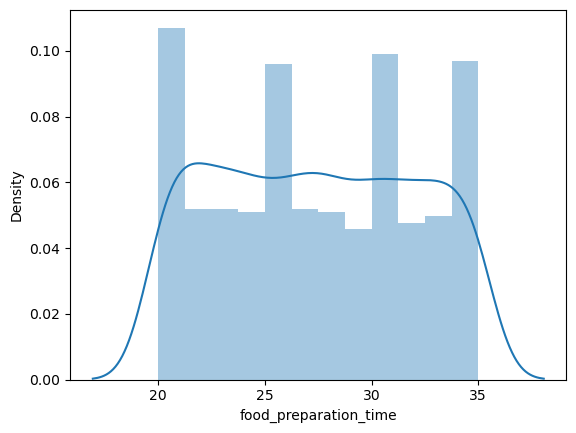

In [94]:
sns.distplot(df['food_preparation_time'], hist = True, kde = True,)

In [ ]:
Observation: 
    1. Distribution of food_preparation_time ranges between 20 and 35 minutes, with most observations similar level of frequency.
    2. few observations, however, stand out with higher frequency of time it takes for food preparation
    3. in constrarst, delivery time, appears multi-modal and left-skewed.
    4. investigating differnces in distribution of cost_of_the order, food_preparation_time and delivery_time by day_of_the week indicate that delivery_time has different distribution during weekdays compared to weekends

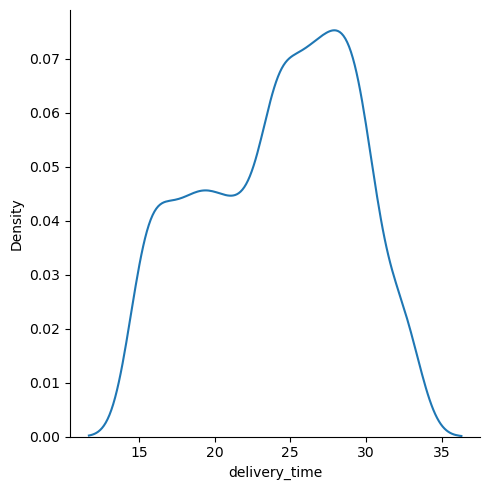

In [45]:
# plot a distribution plot
sns.displot(df['delivery_time'], kind='kde' )
#sns.displot(tips_data['total_bill'], hist=True, kde=True)
#sns.displot(tips_data['total_bill'])
# display the plot
plt.show()

C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

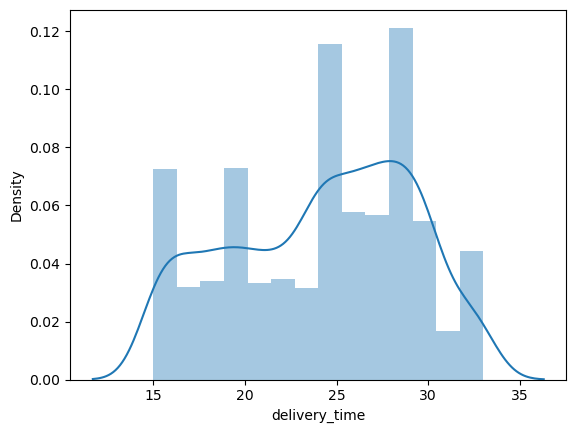

In [98]:
sns.distplot(df['delivery_time'], hist = True, kde = True,)

C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


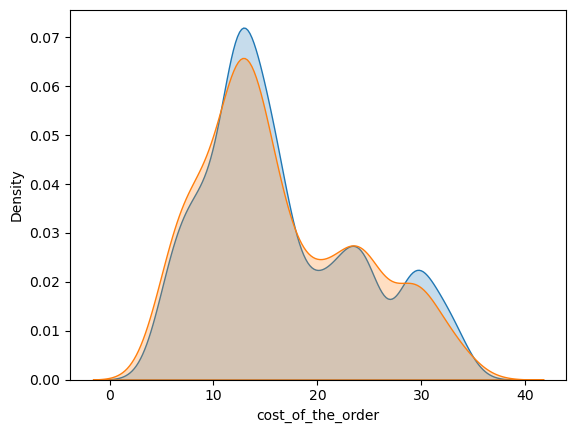

In [46]:
# # iterate the distplot() function over the time

# # list of time
day_of_the_week = ['Weekend', 'Weekday']

# # iterate through time
for i in day_of_the_week:
    subset = df[df['day_of_the_week'] == i]
    
# # Draw the density plot`
# # 'hist = False' will not plot a histogram
# # 'kde = True' plots density curve
    sns.distplot(subset['cost_of_the_order'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)

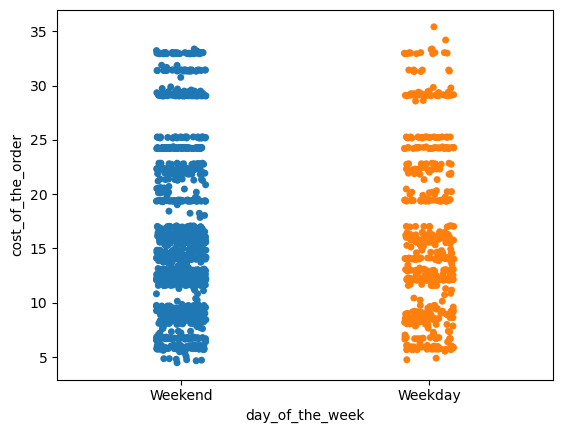

In [65]:
# strip plot
sns.stripplot(y = 'cost_of_the_order', x = 'day_of_the_week', data = df)

# display the plot
plt.show()

C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


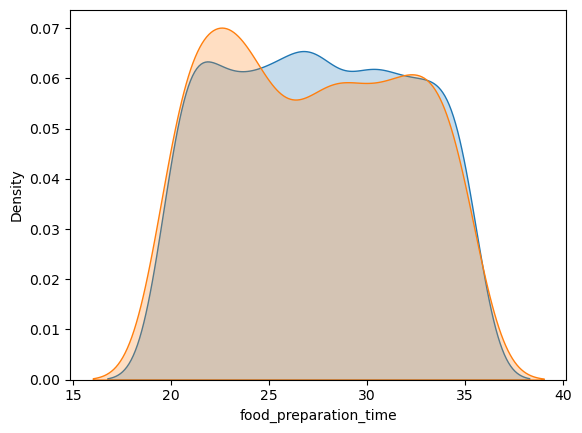

In [82]:

# # list of time
day_of_the_week = ['Weekend', 'Weekday']

# # iterate through time
for i in day_of_the_week:
    subset = df[df['day_of_the_week'] == i]
    
# # Draw the density plot`
# # 'hist = False' will not plot a histogram
# # 'kde = True' plots density curve
    sns.distplot(subset['food_preparation_time'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)

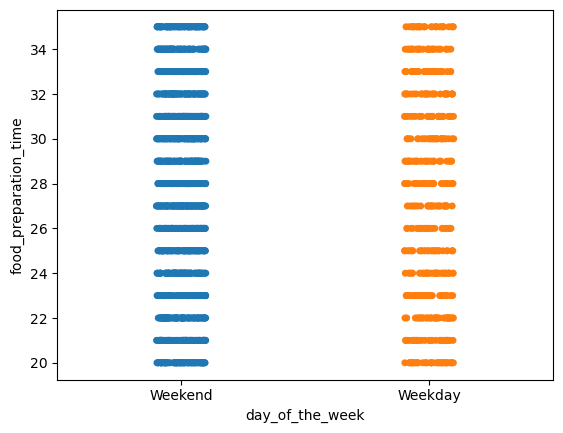

In [62]:
# strip plot
sns.stripplot(y = 'food_preparation_time', x = 'day_of_the_week', data = df)

# display the plot
plt.show()

C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\megab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


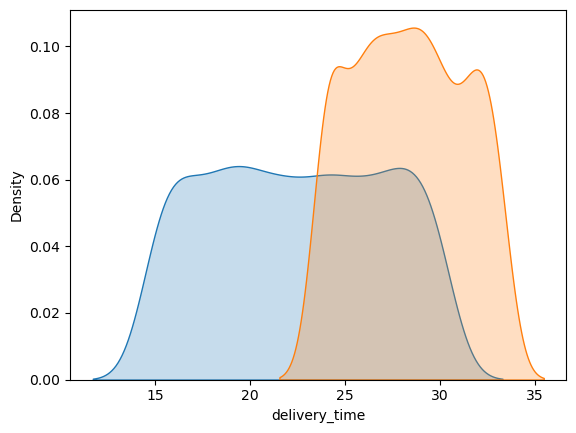

In [48]:
# # list of time
day_of_the_week = ['Weekend', 'Weekday']

# # iterate through time
for i in day_of_the_week:
    subset = df[df['day_of_the_week'] == i]
    
# # Draw the density plot`
# # 'hist = False' will not plot a histogram
# # 'kde = True' plots density curve
    sns.distplot(subset['delivery_time'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)

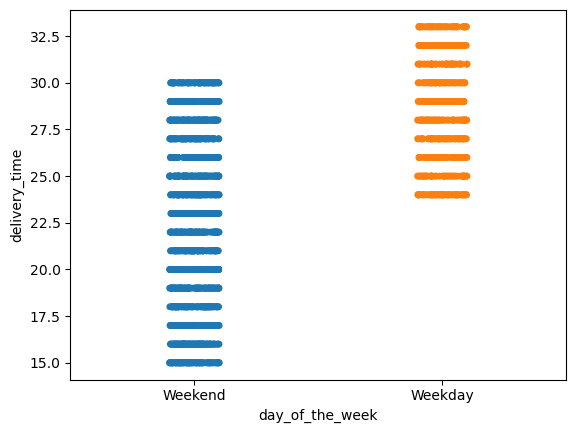

In [60]:
# strip plot
sns.stripplot(y = 'delivery_time', x = 'day_of_the_week', data = df)

# display the plot
plt.show()

Observation: 
    1. Distribution of food_preparation_time ranges between 20 and 35 minutes, with most observations similar level of frequency.
    2. few observations, however, stand out with higher frequency of time it takes for food preparation
    3. in constrarst, delivery time, appears multi-modal and left-skewed.
    4. investigating differnces in distribution of cost_of_the order, food_preparation_time and delivery_time by day_of_the week indicate that delivery_time has different distribution during weekdays compared to weekends

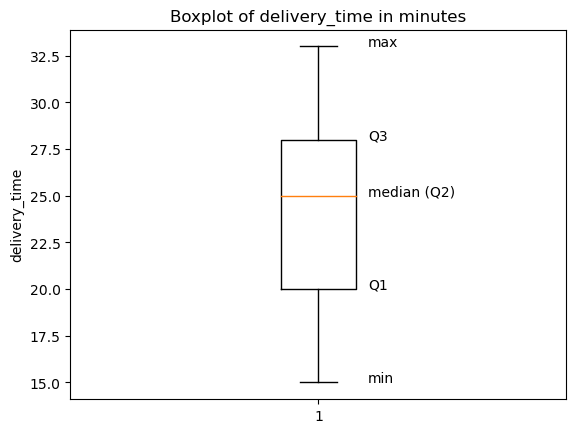

In [80]:
# plot a distribution of delivery_time
plt.boxplot(df['delivery_time'])

# add labels for five number summary
plt.text(x = 1.1, y = df['delivery_time'].min(), s ='min')
plt.text(x = 1.1, y = df.delivery_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['delivery_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.delivery_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['delivery_time'].max(), s ='max')

# add an arrow (annonate) to show the outliers
plt.annotate('Outliers', xy = (0.97,45),xytext=(0.7, 44), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))

# add the graph title and axes labels
plt.title('Boxplot of delivery_time in minutes')
plt.ylabel('delivery_time')

# display the plot
plt.show()

the median of delivery_time variable is slightely more closer to Q3 than Q1

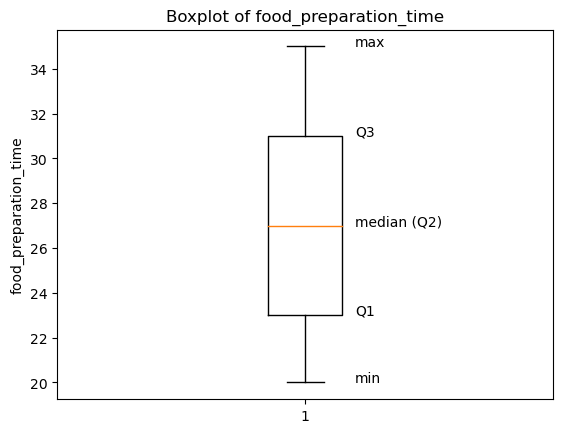

In [78]:
# plot a distribution of food_preparation_time
plt.boxplot(df['food_preparation_time'])

# add labels for five number summary
plt.text(x = 1.1, y = df['food_preparation_time'].min(), s ='min')
plt.text(x = 1.1, y = df.food_preparation_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['food_preparation_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.food_preparation_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['food_preparation_time'].max(), s ='max')

# add an arrow (annonate) to show the outliers
plt.annotate('Outliers', xy = (0.97,45),xytext=(0.7, 44), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))

# add the graph title and axes labels
plt.title('Boxplot of food_preparation_time')
plt.ylabel('food_preparation_time')

# display the plot
plt.show()

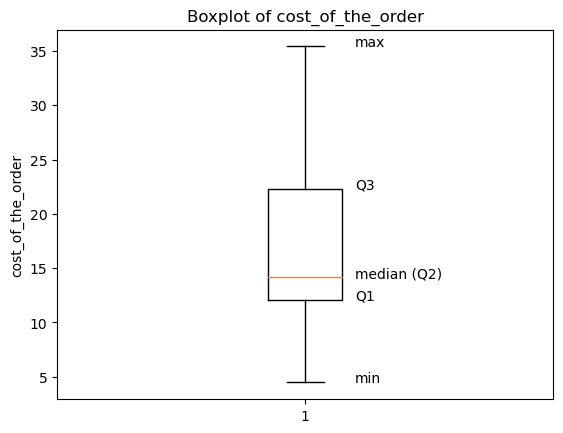

In [77]:
# plot a distribution of cost_of_the_order
plt.boxplot(df['cost_of_the_order'])

# add labels for five number summary
plt.text(x = 1.1, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['cost_of_the_order'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['cost_of_the_order'].max(), s ='max')

# add an arrow (annonate) to show the outliers
plt.annotate('Outliers', xy = (0.97,45),xytext=(0.7, 44), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))

# add the graph title and axes labels
plt.title('Boxplot of cost_of_the_order')
plt.ylabel('cost_of_the_order')

# display the plot
plt.show()

The above boxplot clearly shows that there are no outliers above the horizontal line.  Also, the median (Q2),represented by the orange line, is near to Q1 rather than Q3. This shows that the cost_of_the_order is right skewed.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [5]:
#df.groupby("order_id")["restaurant_name"].nunique().to_frame()    #this tells me that order_id are unique and not repeated
df.groupby("restaurant_name")["order_id"].nunique().to_frame()     #this tells me that order_id can be grouped by restaurant_name

,order_id
restaurant_name,
'wichcraft,1
12 Chairs,4
5 Napkin Burger,5
67 Burger,1
Alidoro,1
...,...
Zero Otto Nove,2
brgr,2
da Umberto,3


In [7]:
df.groupby('restaurant_name')['order_id'].nunique().to_frame().reset_index().sort_values(by='order_id', ascending = False)
#'ascending = False' will sort the data frame in descending order

,restaurant_name,order_id
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68
...,...,...
85,Klong,1
83,Kambi Ramen House,1
77,Il Bambino,1
76,Hunan Manor,1


Observations:The top 5 restaurants with the highest number of orders are: Shake Shack (219 orders), The Meatball Shop (132 orders), Blue Ribbon Sushi(119 orders), Blue Ribbon Fried Chicken(96 orders) and Parm (68 orders)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

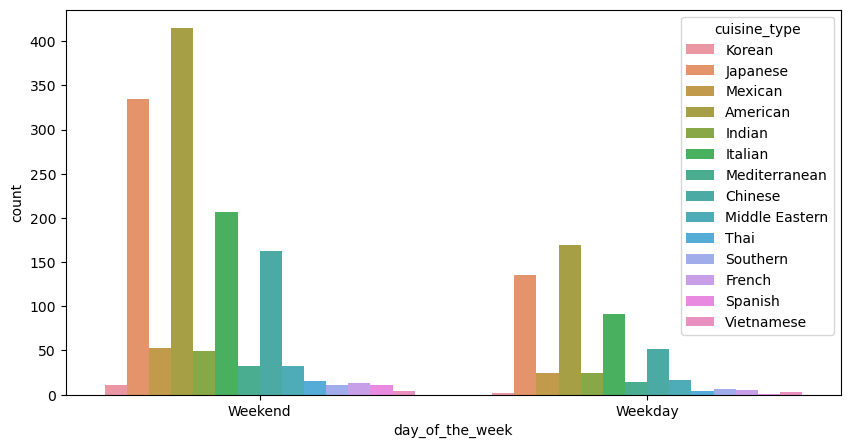

In [11]:
# Write the code here
# count of observations for cuisine_type based on day of the week/or Vice versa?
plt.figure(figsize = (10,5))
# set 'cuisine_type' as hue parameter
  
sns.countplot(data = df, x = 'day_of_the_week', hue='cuisine_type' ) 
#sns.countplot(data = df, x = 'cuisine_type', hue='day_of_the_week' ) will reverse the graph order   
# display the plot
plt.show()

#try to display counts if possible

Observations:The most popular cuisine during weekends is the American cuisne represented by golden bar


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [135]:
# Write the code here
df.cost_of_the_order.describe ()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [198]:
#df = pd.DataFrame(dict1)
 
# Which order cost more than 20 dollars?
df[df.cost_of_the_order > 20].cost_of_the_order.describe()

#print(df[df.cost_of_the_order > 20].cost_of_the_order.describe().T), also give similar result

count    555.000000
mean      26.585423
std        3.851349
min       20.130000
25%       24.200000
50%       25.220000
75%       29.250000
max       35.410000
Name: cost_of_the_order, dtype: float64

In [47]:
print(100*(555/1898))

29.24130663856691


Observations:29.24% of the orders cost more than 20 dollars, with an average order cost of 26.59 (or 2.658542e+01) dollars and up to a maximum of $35.41


### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Write the code here
#df.describe(include=='delivery_time')
df.delivery_time.describe ()


count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [134]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Observations: The mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [138]:
# Write the code here
#df.groupby('customer_id')['customer_id'].nunique().to_frame().reset_index().sort_values(by='customer_id', ascending = False)
df.groupby('customer_id')['order_id'].nunique().to_frame().reset_index().sort_values(by='order_id', ascending = False)

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7
...,...,...
478,105903,1
479,105992,1
480,106006,1
481,106324,1


Observations:the top 3 most frequent customers are custmer number: 52832,47440, and 83287 with 13, 10 and 9 orders, respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Figure size 2000x500 with 0 Axes>

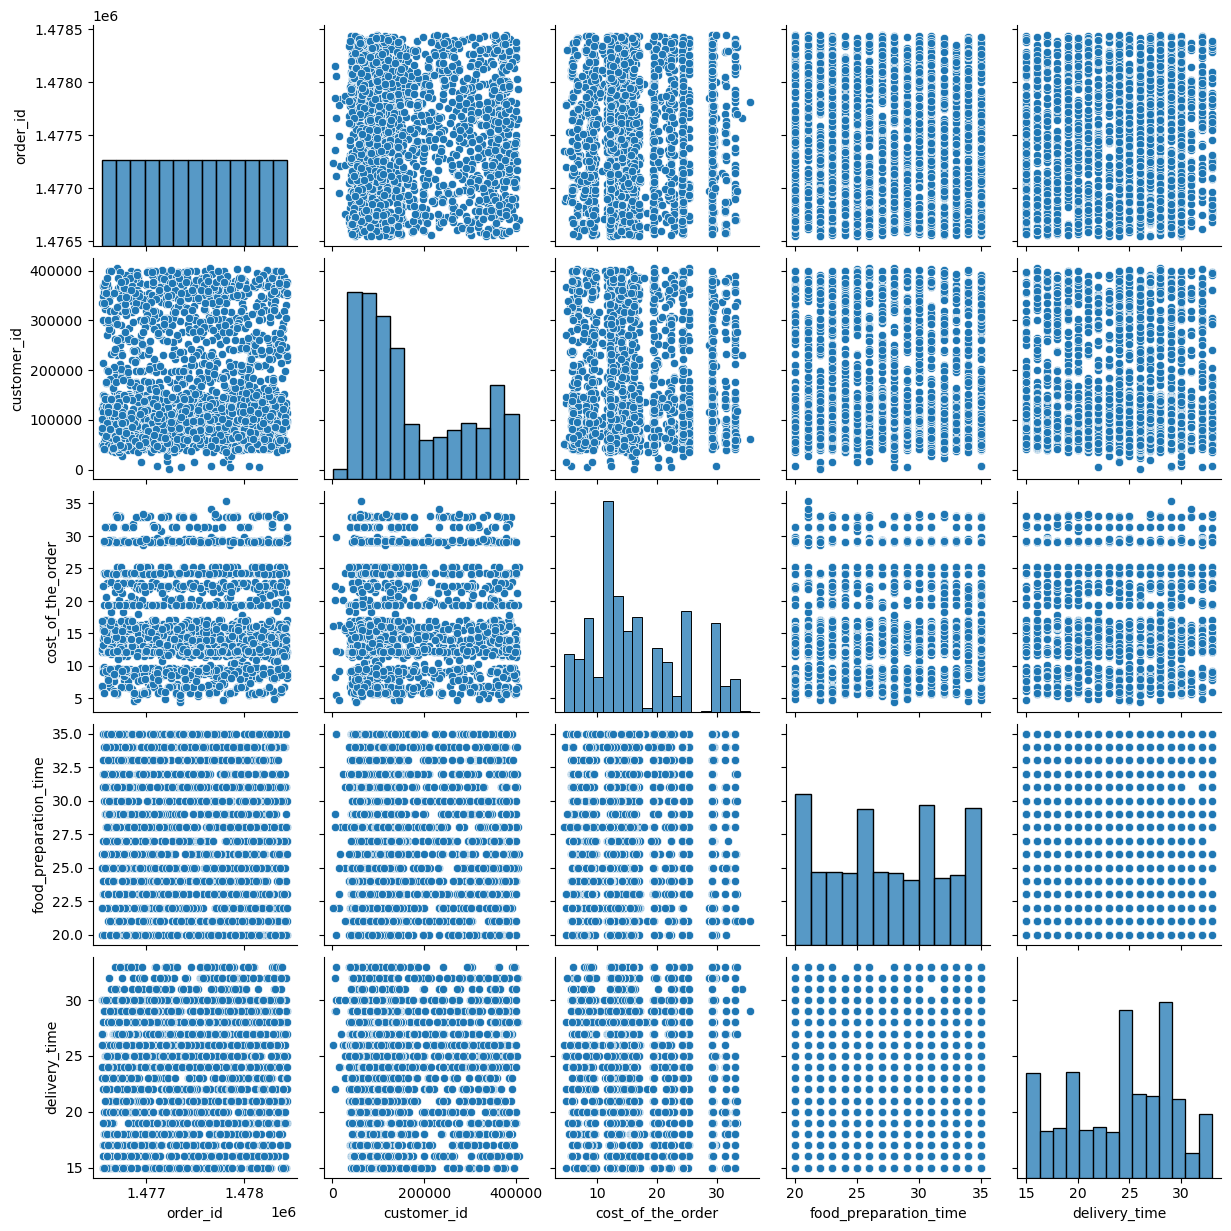

In [221]:
# Write the code here
# set the figure size
plt.figure(figsize = (20,5))

# plot a pair plot
sns.pairplot(df)

# display the plot
plt.show()

# better to try line/scatter plots

In [229]:
X = df2['delivery_time']
Y = df2['rating']

# plot the scatter plot
plt.scatter(X,Y)

# add the axes labels to the plot
plt.xlabel('delivery_time'')
plt.ylabel('rating')

# display the plot
plt.show()

SyntaxError: EOL while scanning string literal (61343200.py, line 8)

In [233]:
df.groupby('rating')[ 'food_preparation_time'].mean().to_frame().reset_index().sort_values(by='rating', ascending = False)

,rating,food_preparation_time
2,5,27.355442
1,4,27.396373
0,3,27.430851


In [234]:
df.groupby('rating')[ 'delivery_time'].mean().to_frame().reset_index().sort_values(by='rating', ascending = False)

,rating,delivery_time
2,5,24.212585
1,4,23.867876
0,3,24.558511


In [235]:
df.groupby('rating')[ 'cost_of_the_order'].mean().to_frame().reset_index().sort_values(by='rating', ascending = False)

,rating,cost_of_the_order
2,5,16.965697
1,4,16.710337
0,3,16.223351


In [220]:
# compute correlation
corr_matrix = df.corr()

corr_matrix
#but how to investigate r/p between numerical and categorical variable as the question suggests?

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


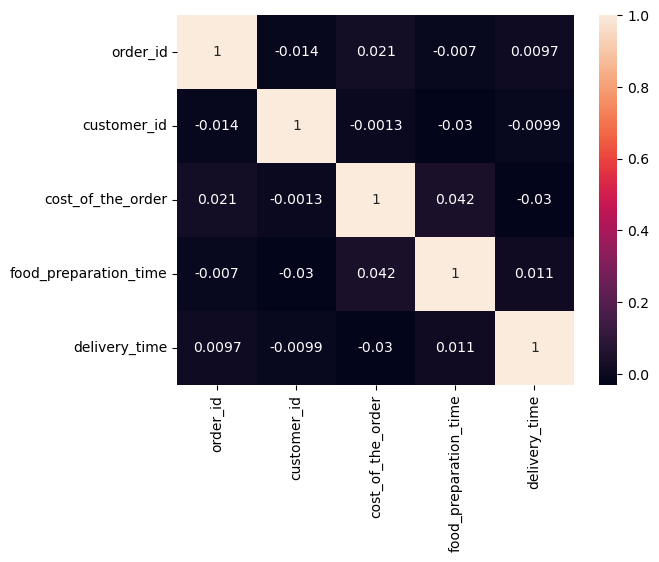

In [89]:
# plot heatmap
# 'annot=True' returns the correlation values 
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

Observation: the above pair plot doesn't provid clear picture on how the variables are related, from the heatmap and the correlation matrix we can observe that:
    1.delivery time is negatively correlated with cost of the order and positively correlated with food_preparation time
    2. cost of the order and food preparation time are positively correlated
    3. higher customer ratings are associated with shorter delivery and food preparation time and orders with higher prices

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [90]:
# Write the code here
df.rating.describe()
#pd.pivot_table(df,index=["restaurant_name"], values=["rating"])
#df[df.cost_of_the_order > 20].cost_of_the_order.describe()
#if ("rating" !='Not given' and ):
    #pd.pivot_table(df,index=["restaurant_name"], values=["rating"])

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [61]:
df.rating.value_counts()
print(588+386+188)

1162


In [60]:
df[df.rating != 'Not given'].rating.describe()

count     1162
unique       3
top          5
freq       588
Name: rating, dtype: object

In [91]:
#treating the missing value "Not given" for rating variable
df2 = pd.read_csv('foodhub_order.csv')
Missing_values=['Not given']
df=df2.replace(Missing_values, np.NaN)
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [104]:
df3["rating"].unique()

array([nan,  5.,  3.,  4.])

In [93]:
#changing datatype of "rating" from object to float and calculating mean rating
df3['rating']=df3['rating'].astype('float64')
m=round(df3['rating'].mean(),2)
m

4.34

In [158]:
#calculating rating count for each restaurant
df3.groupby('restaurant_name')['rating'].sum().to_frame().reset_index().sort_values(by='rating' , ascending = False )
#df3.groupby('restaurant_name')['rating'].nunique().to_frame().reset_index().sort_values(by='rating', ascending = False)

#df.groupby(by = ['borough','hday'])['pickups'].mean()

#df3.groupby('restaurant_name')['rating'].nunique().to_frame().reset_index().sort_values(by='rating', ascending = False)
#df.groupby('restaurant_name')['rating'].nunique().to_frame().reset_index().sort_values(by='rating', ascending = False)

#df.groupby('restaurant_name')['rating'].nunique().to_frame().reset_index().sort_values(by='order_id', ascending = False)
#'ascending = False' will sort the data frame in descending order

,restaurant_name,rating
136,Shake Shack,569.0
153,The Meatball Shop,379.0
21,Blue Ribbon Sushi,308.0
20,Blue Ribbon Fried Chicken,277.0
121,RedFarm Broadway,174.0
...,...,...
40,Coppola's East,0.0
41,Crema Restaurante,0.0
60,Gaia Italian Cafe,0.0
147,Tarallucci e Vino Restaurant,0.0


In [159]:
#calculating average rating for each restaurant
df3.groupby('restaurant_name')['rating'].mean().to_frame().reset_index().sort_values(by='rating', ascending = False)

,restaurant_name,rating
0,'wichcraft,5.0
120,Ravagh Persian Grill,5.0
37,Chola Eclectic Indian Cuisine,5.0
38,Chote Nawab,5.0
82,Junoon,5.0
...,...,...
123,Rohm Thai,NaN
124,Room Service,NaN
139,Spice Thai,NaN
147,Tarallucci e Vino Restaurant,NaN


In [1]:
# selecting restaurants which satisfy the two conditions
#print(df3[df3.groupby('restaurant_name')['rating'].mean() > 4 and df3.groupby('restaurant_name')['rating'].sum()>50] )

#df4=df3[df3.groupby('restaurant_name')['rating'].mean() > 4 and df3.groupby('restaurant_name')['rating'].sum()>50]
#df[df.cost_of_the_order > 20].cost_of_the_order.describe()

#df3.groupby('restaurant_name')['rating'].mean().to_frame().reset_index().sort_values(by='rating', ascending = False)
# selecting restaurants which satisfy the two conditions
#df3.groupby('restaurant_name')['rating'].mean().to_frame().reset_index().sort_values(by='rating', ascending = False)

df[df3.groupby('restaurant_name')['rating'].mean() > 4].restaurant_name.describe()


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [242]:
# Write the code here
#df3.cost_of_the_order.describe()
df[df.cost_of_the_order > 20].cost_of_the_order.describe()

#df[df.cost_of_the_order < 20] and df[df.cost_of_the_order>5].cost_of_the_order.describe()

count    555.000000
mean      26.585423
std        3.851349
min       20.130000
25%       24.200000
50%       25.220000
75%       29.250000
max       35.410000
Name: cost_of_the_order, dtype: float64

In [239]:
df[df.cost_of_the_order < 20].cost_of_the_order.describe()  


count    1343.000000
mean       12.330536
std         3.685591
min         4.470000
25%         9.265000
50%        12.230000
75%        14.990000
max        19.980000
Name: cost_of_the_order, dtype: float64

In [240]:
df[df.cost_of_the_order > 5].cost_of_the_order.describe()

count    1889.000000
mean       16.554833
std         7.457418
min         5.050000
25%        12.080000
50%        14.210000
75%        22.310000
max        35.410000
Name: cost_of_the_order, dtype: float64

In [6]:
#df[df.cost_of_the_order < 5].cost_of_the_order.describe()
#df3=df[df.cost_of_the_order < 5].cost_of_the_order

# Find which of the three number is greater
a = 20
b = 5


if (df.cost_of_the_order>a):
        net_rev=(df3.cost_of_the_order)*0.25
        else:
            net_rev=0
            print("net_rev= ",round(F,2))  
  #net_rev=np(df3[cost_of_the_order>20].cost_of_the_order)*0.25)+np.(df3[cost_of_the_order>5 & cost_of_the_order<20].cost_of_the_order*0.15)
        
            
          

SyntaxError: invalid syntax (2295333467.py, line 11)

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [206]:
# Write the code here
df3.describe()
df3.tot_time=df3.food_preparation_time+df3.delivery_time
df3.tot_time.describe().T

#df3[df3.tot_time > 60].tot_time.describe()
print(df3[df3.tot_time > 60])

      order_id  customer_id             restaurant_name    cuisine_type  \
7      1477859        89574                   Barbounia   Mediterranean   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼         Chinese   
19     1477354        67487           Blue Ribbon Sushi        Japanese   
24     1476714       363783                Cafe Mogador  Middle Eastern   
54     1477760       130507           Jack's Wife Freda   Mediterranean   
...        ...          ...                         ...             ...   
1869   1476923        50199                 J. G. Melon        American   
1873   1478148       261371                 Shake Shack        American   
1875   1478039       292343                  Amy Ruth's        Southern   
1880   1477466       222734                 Shake Shack        American   
1889   1478190        94152            RedFarm Broadway         Chinese   

      cost_of_the_order day_of_the_week  rating  food_preparation_time  \
7                  5.97  

In [207]:
print(100*(200/1898))

10.537407797681771


Observations: 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [169]:
# Write the code here
#df.groupby('day_of_the_week')['delivery_time'].nunique().to_frame().reset_index().sort_values(by='delivery_time', ascending = False)
df.groupby('day_of_the_week').agg({'delivery_time':['min','max','mean', "std"]})

delivery_time                         
                          min max       mean       std
day_of_the_week                                       
Weekday                    24  33  28.340037  2.891428
Weekend                    15  30  22.470022  4.628938

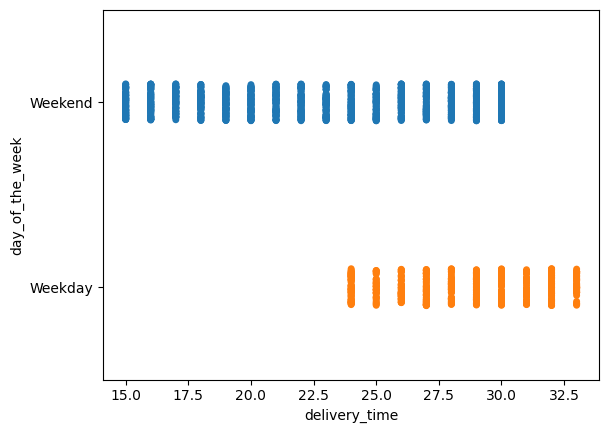

In [171]:
# strip plot
sns.stripplot(x = 'delivery_time', y = 'day_of_the_week', data = df)

# display the plot
plt.show()

Observations: Mean delivery time for weekdays is 28.34 minutes whereas it is 22.47 minutes during weekend. Thus it takes longer to deliver during weekdays. This is likely due to trafic congestion during weekdays as transport infrastructue is shared by multiple and many communters. however, as seen from the above stripplot, the delivery time during weekend has a wider range of values, compared to that of delivery time during weekdays, on average.

# Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  customer Ratings are higher for shorter delivery and food-preparation time, and for orders with higher prices
* customer Ratings are higher during weekends and people tend to give ratings more often during Weekends than weekdays
*number of orders is also higher during weekends than weekdays
* the three most popular cusine types are American, Japanese,Italian and Chinese 

### Recommendations:

* Improve busienss performance by investing in infrastructures which minimize delivery_time, improving customer rating,satisfaction and net revenue by incentivizing restaurants to minmize food preparation time and introducing in dmand cuisines.

---